# Lab 4 - Gradient Descent | Linear Regression
## Coder Name: Janojit Chakraborty
## Coder Registration Number: 21112011

### Dataset Description: 
The Boston housing data. Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The attributes are deﬁned as follows (taken from the UCI Machine Learning Repository.

    1) CRIM - per capita crime rate by town
    2) ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
    3) INDUS: proportion of non-retail business acres per town
    4) CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    5) NOX: nitric oxides concentration (parts per 10 million)
    6) RM: average number of rooms per dwelling
    7) AGE: proportion of owner-occupied units built prior to 1940
    8) DIS: weighted distances to ﬁve Boston employment centers
    9) RAD: index of accessibility to radial highways
    10) TAX: full-value property-tax rate per 10,000 doller
    11) PTRATIO: pupil-teacher ratio by town
    12) B: (1000(Bk−0.63)2) where Bk is the proportion of blacks by
    13) LSTAT: % lower status of the population
    14) MEDV: Median value of owner-occupied homes in 1000 doller

### Objective:
- Understand Gradient Descent
- Optimisation of Loss Function
- Exploring Epochs and Learning Rate
- Exploring Gradient Descent and OLS

### Problem Definition
Implement Linear Regression with Gradient Descent.

Use necessary visualisations, plots, and other relevant factors to prove that the model's loss is converging to the minima. Check whether the number of iterations (epochs) or learning rate change the way in which the algorithm is trained. Compare the trained model with any OLS based linear regression model and comment on your learnings.

ADDITIONAL: Implement Multiple Linear Regression based on Gradient Descent. Once done, fit the Boston House Prices dataset using the user-defined functions that you created. Once done, compare it with any OLS based model, and provide your comments.

### Approach: 
- Partial Differentiation of Loss Function
- Using Trial and Error Method Find Perfect Epochs and Learning Rate
- Comparing Gradient Descent with OLS 

### Observation:
- Using Gradient Descent, we find out the Optimal value of W(Weight/Coefficient) and B(Bias/Intercept) which are [-0.71043053] and [0.57820549] respectively, where Loss is equals to 0.00883, when Learning Rate is 1 and Epoch Value is 165.
- Using Sklearn we also found almost same value of Coefficient and Bias.
- Reg Plot also Satifing with the computed values that we got using Gradient Descent.
- Both OLS and Gradient Descent are Optimization Algorithm but as their aproach is different that's why Weights and bias might be different for respective method.

### Learnings & Reflection:
- Get Knowledge about Gradient Descent
- Able to understand Working Mechanism of the Optimization of Linear Regression Model
- Get more knowledge about Epochs and Learning Rate
- Able To observe the Difference between Gradient Descent and OLS

Name: **Janojit Chakraborty** <br>
Reg No: **21112011** <br>
Class: **4 BSC DS** <br>

---------------


| Assignment | Status |
| --- | --- |
|     | __Completed__ |

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=columns)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [3]:
def part_der_J_b_slr(n, w, X, b, y):
    total = 0
    for i in range(0, n):
        iteration = (y_cap_slr(w, X[i], b) - y[i])
        total = total + iteration
    return total/n

In [4]:
def part_der_J_w_slr(n, w, X, b, y):
    total = 0
    for i in range(0, n):
        iteration = (y_cap_slr(w, X[i], b) - y[i]) * X[i]
        total = total + iteration
    return total/n

In [5]:
def y_cap_slr(w, x, b):
    return w*x + b

In [6]:
def calculate_loss_slr(n, w, X, b, y):
    total = 0
    for i in range(0, n):
        iteration = (y_cap_slr(w, X[i], b) - y[i])**2
        total = total + iteration
    return total/(2*n)

In [7]:
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(df[['MEDV']])
y = MinMaxScaler().fit_transform(df[['LSTAT']])

Enter Learning Rate: 1
Enter Epoch Value: 165
No of Data Points: 506
------------
Initial Parameters - W: [0], b = [0]
Hyper Parameters - alpha: 1.0, epochs: 165
--------------------------------------------------
 After 1 Iteration
CURRENT LOSS:  0.06479951914913148
W: [0], B: [0]
--------------------------------------------------
 After 2 Iteration
CURRENT LOSS:  0.02213920445594001
W: [0.08778523], B: [0.26720633]
--------------------------------------------------
 After 3 Iteration
CURRENT LOSS:  0.021052856279679788
W: [0.05447646], B: [0.28018402]
--------------------------------------------------
 After 4 Iteration
CURRENT LOSS:  0.020055196910453994
W: [0.02255628], B: [0.2926207]
--------------------------------------------------
 After 5 Iteration
CURRENT LOSS:  0.019138985847781304
W: [-0.00803318], B: [0.3045389]
--------------------------------------------------
 After 6 Iteration
CURRENT LOSS:  0.01829757370125344
W: [-0.03734741], B: [0.31596025]
-------------------------

--------------------------------------------------
 After 96 Iteration
CURRENT LOSS:  0.008836977451211708
W: [-0.6966098], B: [0.57282069]
--------------------------------------------------
 After 97 Iteration
CURRENT LOSS:  0.008836615029548432
W: [-0.69721818], B: [0.57305773]
--------------------------------------------------
 After 98 Iteration
CURRENT LOSS:  0.008836282195770196
W: [-0.69780121], B: [0.57328488]
--------------------------------------------------
 After 99 Iteration
CURRENT LOSS:  0.00883597653434
W: [-0.69835993], B: [0.57350257]
--------------------------------------------------
 After 100 Iteration
CURRENT LOSS:  0.008835695826923815
W: [-0.69889536], B: [0.57371118]
--------------------------------------------------
 After 101 Iteration
CURRENT LOSS:  0.008835438036291035
W: [-0.69940847], B: [0.5739111]
--------------------------------------------------
 After 102 Iteration
CURRENT LOSS:  0.008835201291529354
W: [-0.69990018], B: [0.57410268]
----------------

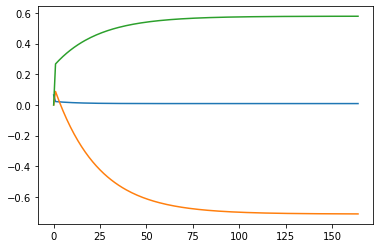

In [8]:
alpha = float(input("Enter Learning Rate: "))
epoch = int(input("Enter Epoch Value: "))
w = [0]
b = [0]

n = len(X)

array_of_losses = []
array_of_ws = []
array_of_bs = []

#print("X : {}, Y: {}". format(X, Y))
print("No of Data Points: {}".format(n))
print("------------")
print("Initial Parameters - W: {}, b = {}".format(w, b))
print("Hyper Parameters - alpha: {}, epochs: {}".format(alpha, epoch))

for i in range(0, epoch):
    loss = calculate_loss_slr(n, w, X, b, y)
    
    array_of_losses.append(loss[0])
    array_of_ws.append(w[0])
    array_of_bs.append(b[0])
    
    print("-"*50)
    print("\033[94m After {} Iteration".format(i+1))
    print("CURRENT LOSS: ", (float(loss)))

    print("W: {}, B: {}".format(w, b))

    w = w - alpha * part_der_J_w_slr(n, w, X, b, y)
    b = b - alpha * part_der_J_b_slr(n, w, X, b, y)
    
display(plt.plot(array_of_losses))
display(plt.plot(array_of_ws))
display(plt.plot(array_of_bs))

**Observation:**<br>
- Using Gradient Descent, we find out the Optimal value of W(Weight/Coefficient) and B(Bias/Intercept) which are [-0.71043053] and [0.57820549] respectively, where Loss is equals to 0.00883, when Learning Rate is 1 and Epoch Value is 165.

In [9]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X, y)
print(lr.coef_)
print(lr.intercept_)

[[-0.71120342]]
[0.57850663]


**Observation:**<br>
- Using Sklearn we also found almost same value of Coefficient and Bias.

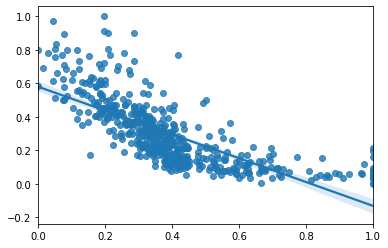

In [10]:
sns.regplot(x = X,y = y)
plt.show()

**Observation:**<br>
- Reg Plot also Satifing with the computed values that we got using Gradient Descent.

In [11]:
import statsmodels.api as sm
model = sm.OLS(y, X).fit()

print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.307
Model:                            OLS   Adj. R-squared (uncentered):              0.306
Method:                 Least Squares   F-statistic:                              224.0
Date:                Tue, 28 Feb 2023   Prob (F-statistic):                    3.47e-42
Time:                        22:40:12   Log-Likelihood:                         -108.13
No. Observations:                 506   AIC:                                      218.3
Df Residuals:                     505   BIC:                                      222.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------